# Introduction

We would be working on the 'Forest Cover Type' Dataset acquired from UCI directory to build models and see the effects of model parameters choose the best one which predicts the target 'Cover Type'.   

The Tasks we would Cover are :
1.Visualize the univariate distribution of each feature, and the distribution of the target.

2.Split data into training and test set. Evaluate logistic regression, linear support vector machines, nearest centroids, decision tree using cross-validation and at least one of the ensemble models. How different are the results? How does scaling the data with StandardScaler influence the results?

3.Tune the parameters using GridSearchCV or warm-starts. Do the results improve? Visualize the performance as function of the parameters for all models.

4.Change the cross-validation strategy from ‘stratified k-fold’ to ‘kfold’ with shuffling. Do the parameters that are found change? Do they change if you change the random seed of the shuffling? Or if you change the random state of the split into training and test data?

5.Visualize the coefficients for logistic regression and linear support vector machines, and feature importance for decision tree.


# 1. Descriptive Analysis 

In [1]:
#Importing Required Libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Reading the data 
data=pd.read_csv("C:/Users/Lenovo/Desktop/covtype.data",header=None)
columns =("Elevation",
          "Aspect",
          "Slope",
          "Horizontal_Distance_To_Hydrology",
          "Vertical_Distance_To_Hydrology",
          "Horizontal_Distance_To_Roadways",
          "Hillshade_9am",
          "Hillshade_Noon",
          "Hillshade_3pm",
          "Horizontal_Distance_To_Fire_Points",
          "Wilderness_Area_1",
          "Wilderness_Area_2",
          "Wilderness_Area_3",
          "Wilderness_Area_4",
          "Soil_Type_1",
          "Soil_Type_2",
          "Soil_Type_3",
          "Soil_Type_4",
          "Soil_Type_5",
          "Soil_Type_6",
          "Soil_Type_7",
          "Soil_Type_8",
          "Soil_Type_9",
          "Soil_Type_10",
          "Soil_Type_11",
          "Soil_Type_12",
          "Soil_Type_13",
          "Soil_Type_14",
          "Soil_Type_15",
          "Soil_Type_16",
          "Soil_Type_17",
          "Soil_Type_18",
          "Soil_Type_19",
          "Soil_Type_20",
          "Soil_Type_21",
          "Soil_Type_22",
          "Soil_Type_23",
          "Soil_Type_24",
          "Soil_Type_25",
          "Soil_Type_26",
          "Soil_Type_27",
          "Soil_Type_28",
          "Soil_Type_29",
          "Soil_Type_30",
          "Soil_Type_31",
          "Soil_Type_32",
          "Soil_Type_33",
          "Soil_Type_34",
          "Soil_Type_35",
          "Soil_Type_36",
          "Soil_Type_37",
          "Soil_Type_38",
          "Soil_Type_39",
          "Soil_Type_40",
          "Cover_Type")

data.columns= columns

In [3]:
#Checking the Dataset
data.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,Soil_Type_40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5


In [4]:
#EDA
data.describe(include='all')

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,Soil_Type_40,Cover_Type
count,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,...,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000
mean,2959.365301,155.656807,14.103704,269.428217,46.418855,2350.146611,212.146049,223.318716,142.528263,1980.291226,...,0.090392,0.077716,0.002773,0.003255,0.000205,0.000513,0.026803,0.023762,0.015060,2.051471
std,279.984734,111.913721,7.488242,212.549356,58.295232,1559.254870,26.769889,19.768697,38.274529,1324.195210,...,0.286743,0.267725,0.052584,0.056957,0.014310,0.022641,0.161508,0.152307,0.121791,1.396504
min,1859.000000,0.000000,0.000000,0.000000,-173.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2809.000000,58.000000,9.000000,108.000000,7.000000,1106.000000,198.000000,213.000000,119.000000,1024.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,2996.000000,127.000000,13.000000,218.000000,30.000000,1997.000000,218.000000,226.000000,143.000000,1710.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,3163.000000,260.000000,18.000000,384.000000,69.000000,3328.000000,231.000000,237.000000,168.000000,2550.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
max,3858.000000,360.000000,66.000000,1397.000000,601.000000,7117.000000,254.000000,254.000000,254.000000,7173.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000


In [5]:
#Checking for Null Values 
data.isnull().any().any()

False

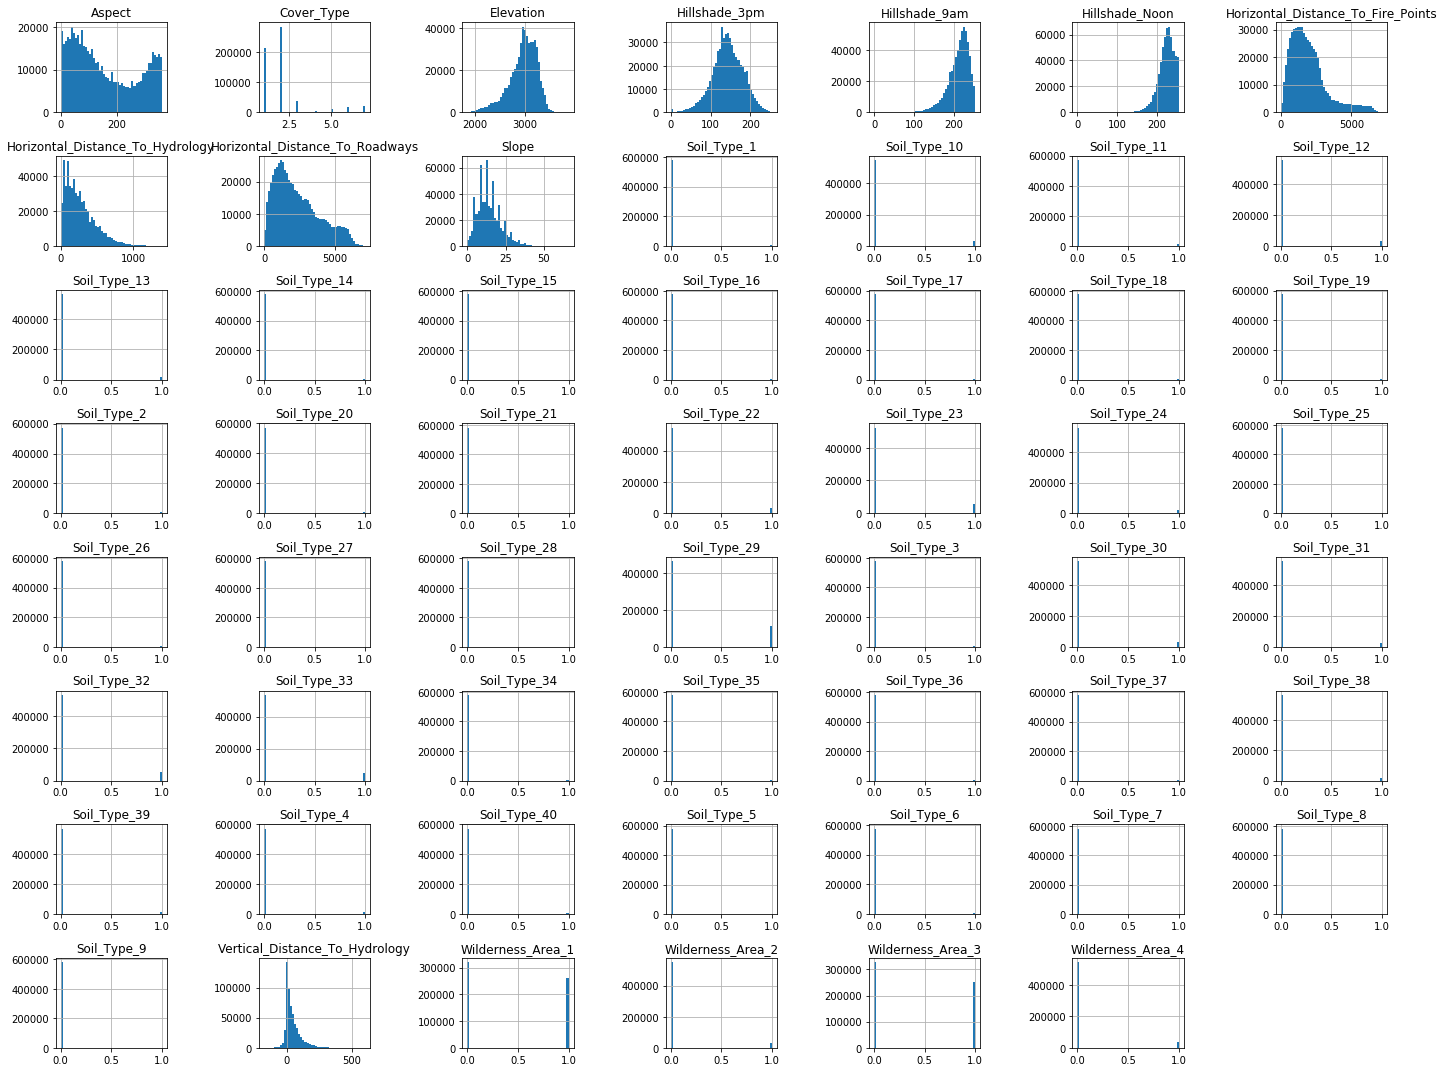

In [6]:
#Histogram of all attributes
data.hist(bins=50, figsize=(20,15))
plt.tight_layout()    
plt.show()

- The Soil Type and Wilderness Type are binary values of 0 or 1 
- Horizontal Distance to Roadways, Horizontal Distance to Hydrology, Horizontal distance to Fire Point are left skewed
- Elevation, Hillshade 9am and noon are right skewed 
- Aspect is randomly distributed 

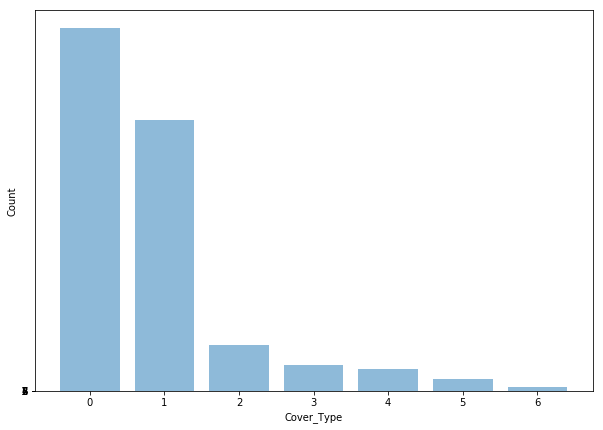

In [7]:
#Bar Plot of Target Variable Cover_Type
Target = data['Cover_Type'].value_counts().index.tolist()
y_pos = np.arange(len(Target))
performance = data['Cover_Type'].value_counts().tolist()

plt.figure(figsize=(10,7))
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.yticks(y_pos, Target)
plt.xlabel('Cover_Type')
plt.ylabel('Count')
plt.show()

- The Cover type 0 & 1 exist more than the other 5 cover types 

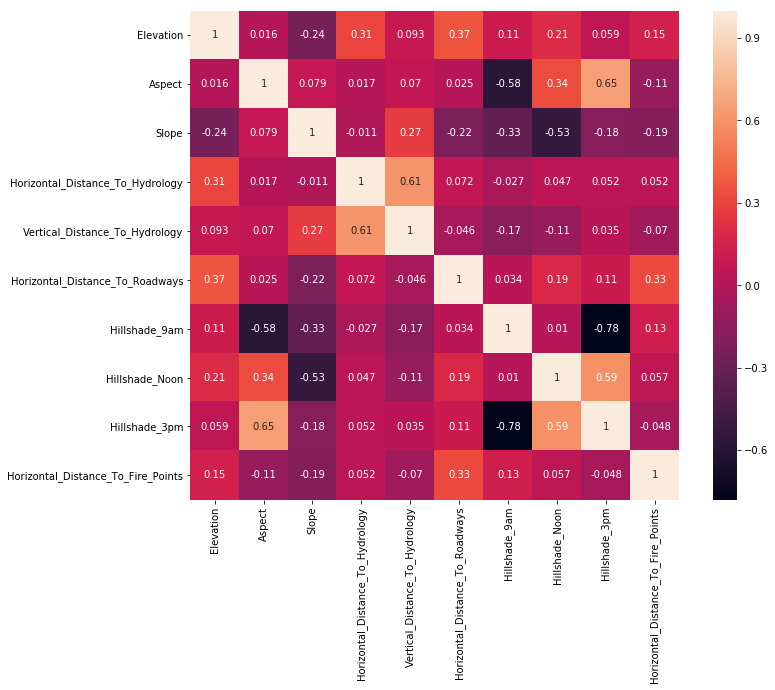

In [8]:
#Correlation Matrix
import seaborn as sns
corrmat = data.iloc[:,:10].corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, square=True, annot=True);

In [9]:
#Highly Correlated Values 
cols1 = data.columns 
df_covtype_corr = data.corr()
threshold = 0.5 #50% correlation threshold

#searching for highly correlated continuous features  
corr_list = []
for i in range(0, 10):
    for j in range(i+1, 10): #avoid repetition
        if (df_covtype_corr.iloc[i, j] >= threshold and df_covtype_corr.iloc[i,j] < 1) or (
            df_covtype_corr.iloc[i,j] < 0 and df_covtype_corr.iloc[i,j] <= -threshold):
            corr_list.append([df_covtype_corr.iloc[i, j], i, j]) #store correlation and columns index

#show higher first            
s_corr_list = sorted(corr_list, key=lambda x: -abs(x[0]))

for v,i,j in s_corr_list:
    print ("%s and %s = %.2f" % (cols1[i],cols1[j],v))

Hillshade_9am and Hillshade_3pm = -0.78
Aspect and Hillshade_3pm = 0.65
Horizontal_Distance_To_Hydrology and Vertical_Distance_To_Hydrology = 0.61
Hillshade_Noon and Hillshade_3pm = 0.59
Aspect and Hillshade_9am = -0.58
Slope and Hillshade_Noon = -0.53


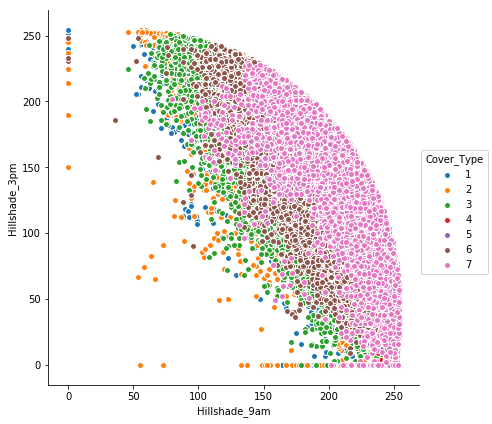

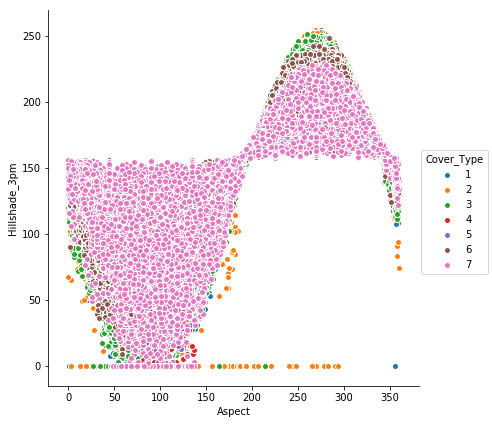

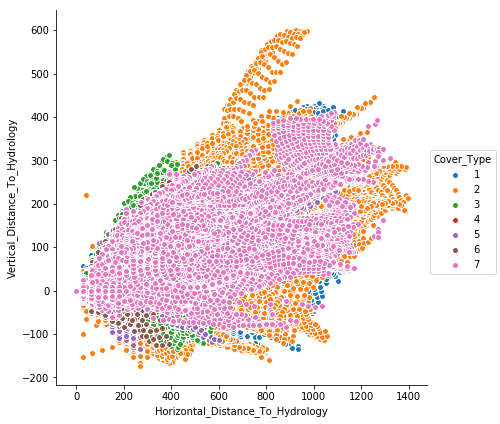

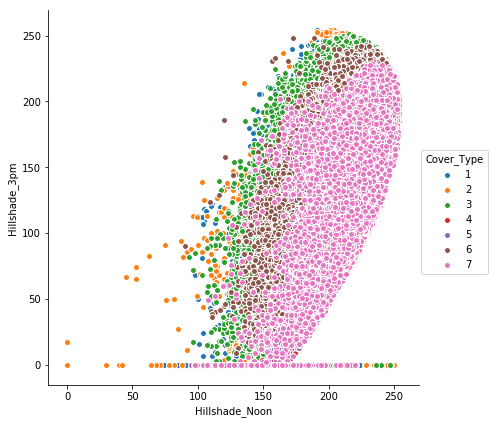

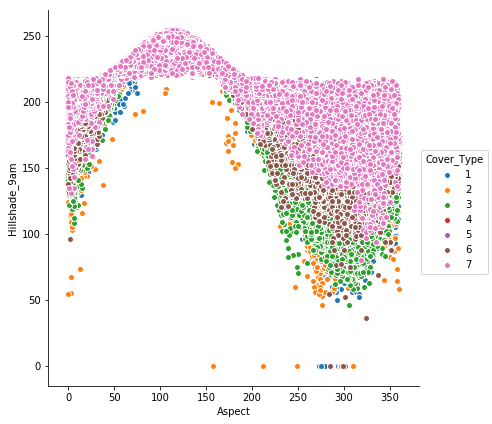

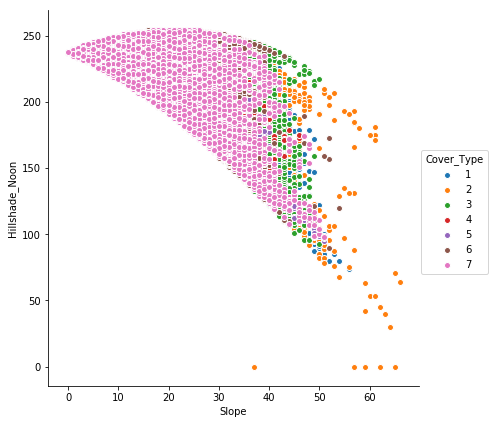

In [10]:
#Pairplot of target variable with highly correlated dependent variables 
for v,i,j in s_corr_list:
    sns.pairplot(data, hue='Cover_Type', size=6, x_vars=columns[i],y_vars=columns[j] )
    plt.show()

# 1.1 Splitting the dataset 

In [11]:
#Splitting Dataset into Target and Dependent Variables
data=data.sample(frac=0.1).reset_index(drop=True)

X=data[["Elevation",
          "Aspect",
          "Slope",
          "Horizontal_Distance_To_Hydrology",
          "Vertical_Distance_To_Hydrology",
          "Horizontal_Distance_To_Roadways",
          "Hillshade_9am",
          "Hillshade_Noon",
          "Hillshade_3pm",
          "Horizontal_Distance_To_Fire_Points",
          "Wilderness_Area_1",
          "Wilderness_Area_2",
          "Wilderness_Area_3",
          "Wilderness_Area_4",
          "Soil_Type_1",
          "Soil_Type_2",
          "Soil_Type_3",
          "Soil_Type_4",
          "Soil_Type_5",
          "Soil_Type_6",
          "Soil_Type_7",
          "Soil_Type_8",
          "Soil_Type_9",
          "Soil_Type_10",
          "Soil_Type_11",
          "Soil_Type_12",
          "Soil_Type_13",
          "Soil_Type_14",
          "Soil_Type_15",
          "Soil_Type_16",
          "Soil_Type_17",
          "Soil_Type_18",
          "Soil_Type_19",
          "Soil_Type_20",
          "Soil_Type_21",
          "Soil_Type_22",
          "Soil_Type_23",
          "Soil_Type_24",
          "Soil_Type_25",
          "Soil_Type_26",
          "Soil_Type_27",
          "Soil_Type_28",
          "Soil_Type_29",
          "Soil_Type_30",
          "Soil_Type_31",
          "Soil_Type_32",
          "Soil_Type_33",
          "Soil_Type_34",
          "Soil_Type_35",
          "Soil_Type_36",
          "Soil_Type_37",
          "Soil_Type_38",
          "Soil_Type_39",
          "Soil_Type_40"]]

y= data["Cover_Type"]

In [12]:
#Splitting the dataset into Train and Test set 
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7) 
print("Dataset:", len(X_train), "train +", len(X_test), "test")

Dataset: 46480 train + 11621 test


# 2. Machine Learning models with StratifiedKFold

In [13]:
#Applying Stratified KFold CV to the Train and Test set
from sklearn import model_selection
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=2, random_state=100)
for train_index,test_index in skf.split(X,y): 
    print("Train:", train_index, "Validation:", test_index) 
    X_train, X_test = X.iloc[train_index], X.iloc[test_index] 
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

Train: [28800 28816 28825 ... 58098 58099 58100] Validation: [    0     1     2 ... 30452 30620 30705]
Train: [    0     1     2 ... 30452 30620 30705] Validation: [28800 28816 28825 ... 58098 58099 58100]


In [14]:
#Logistic Regression 
from sklearn.linear_model import LogisticRegression
from sklearn import metrics, cross_validation
from sklearn.model_selection import cross_val_score

LR=LogisticRegression()
LR.fit(X_train,y_train)
y_pred=LR.predict(X_test)
print ("Logistic Regression Accuracy : ",metrics.accuracy_score(y_test, y_pred))
scores = cross_val_score(LR, X_train, y_train) 
print("Cross-Validation score:",scores)

C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Logistic Regression Accuracy :  0.7112465145099659
Cross-Validation score: [0.71546562 0.70859149 0.71472836]


In [15]:
#Linear SVC 
from sklearn.svm import LinearSVC
LSV=LinearSVC()
LSV.fit(X_train,y_train)
y_pred=LSV.predict(X_test)
print ("LinearSVC : ",metrics.accuracy_score(y_test, y_pred))
scores = cross_val_score(LSV, X_train, y_train) 
print("Cross-Validation score:",scores)

LinearSVC :  0.45206375434610485
Cross-Validation score: [0.53376007 0.43287898 0.54740756]


In [16]:
#Nearest Centroid 
from sklearn.neighbors import NearestCentroid 
NCR=NearestCentroid()
NCR.fit(X_train,y_train)
y_pred=NCR.predict(X_test)
print ("NearestCentroid : ",metrics.accuracy_score(y_test, y_pred))
scores = cross_val_score(NCR, X_train, y_train) 
print("Cross-Validation score:",scores)

NearestCentroid :  0.1940858549347654
Cross-Validation score: [0.20101177 0.18535729 0.1938649 ]


In [17]:
#Decision Tree
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
DT=DecisionTreeClassifier()
DT.fit(X_train,y_train)
y_pred=DT.predict(X_test)
print ("DecisionTreeClassifier : ",metrics.accuracy_score(y_test, y_pred))
scores = cross_val_score(DT, X_train, y_train) 
print("Cross-Validation score:",scores)

DecisionTreeClassifier :  0.799407897001618
Cross-Validation score: [0.77472641 0.76445684 0.7682297 ]


In [18]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
RF=RandomForestClassifier()
RF.fit(X_train,y_train)
y_pred=RF.predict(X_test)
print ("RandomForestClassifier : ",metrics.accuracy_score(y_test, y_pred))
scores = cross_val_score(RF, X_train, y_train) 
print("Cross-Validation score:",scores)

RandomForestClassifier :  0.8377913181176633
Cross-Validation score: [0.81850093 0.80452292 0.8154307 ]


The Model with StratifiedKFold CV Accuracy Scores are as follows:
- Logistic Regression 71.1%
- Linear SVC 45.2%
- Nearest Centroid 19.4%
- Decision Tree 79.9%
- Random Forest 83.7%

Random Forest proves to have a better accuracy among all the models 

# 2.1 Modeling using Bagging  

In [19]:
#Bagging with Logistic Regression 
from sklearn.ensemble import BaggingClassifier

BAG = BaggingClassifier(LR, max_samples=0.5, max_features=1.0, n_estimators=20, random_state=7)
BAG.fit(X_train, y_train)
print("Bagging of LR" , BAG.score(X_test, y_test))

Bagging of LR 0.7104547488725946


In [20]:
#Bagging With LinearSVC
BAG = BaggingClassifier(LSV, max_samples=0.5, max_features=1.0, n_estimators=20, random_state=7)
BAG.fit(X_train, y_train)
print("Bagging of LSV" , BAG.score(X_test, y_test))

Bagging of LSV 0.6042548796860477


In [21]:
#Bagging with NearestCentroid
BAG = BaggingClassifier(NCR, max_samples=0.5, max_features=1.0, n_estimators=20, random_state=7)
BAG.fit(X_train, y_train)
print("Bagging of NCR" , BAG.score(X_test, y_test))

Bagging of NCR 0.1919171055802265


In [22]:
#Bagging with Decision Tree 
BAG = BaggingClassifier(DT, max_samples=0.5, max_features=1.0, n_estimators=20, random_state=7)
BAG.fit(X_train, y_train)
print("Bagging of DT" , BAG.score(X_test, y_test))

Bagging of DT 0.8442287169954216


In [23]:
#Bagging with Random Forest 
BAG = BaggingClassifier(RF, max_samples=0.5, max_features=1.0, n_estimators=20, random_state=7)
BAG.fit(X_train, y_train)
print("Bagging of RF" , BAG.score(X_test, y_test))

Bagging of RF 0.8275672140176943


The Model after Bagging have Accuracy Scores are as follows:
- Logistic Regression 71.1% same
- Linear SVC 60.4% inc 
- Nearest Centroid 19.19% same
- Decision Tree 84.4% inc
- Random Forest 82.7% dec

Decision Tree proves to have a better accuracy among all the models after Bagging. The LR and NCR model accuracy remains quite similar to that without bagging. The Linear SVC and Decision Tree Accuracy has increased and Random Forest score has slightly decreased after Bagging. 


# 2.3 Modeling after scaling data 

In [24]:
#Scaling od the Data 
from sklearn.preprocessing import StandardScaler      
scaler=StandardScaler()
X_Scaled=pd.DataFrame(scaler.fit_transform(X))
X_Scaled.columns=["Elevation",
          "Aspect",
          "Slope",
          "Horizontal_Distance_To_Hydrology",
          "Vertical_Distance_To_Hydrology",
          "Horizontal_Distance_To_Roadways",
          "Hillshade_9am",
          "Hillshade_Noon",
          "Hillshade_3pm",
          "Horizontal_Distance_To_Fire_Points",
          "Wilderness_Area_1",
          "Wilderness_Area_2",
          "Wilderness_Area_3",
          "Wilderness_Area_4",
          "Soil_Type_1",
          "Soil_Type_2",
          "Soil_Type_3",
          "Soil_Type_4",
          "Soil_Type_5",
          "Soil_Type_6",
          "Soil_Type_7",
          "Soil_Type_8",
          "Soil_Type_9",
          "Soil_Type_10",
          "Soil_Type_11",
          "Soil_Type_12",
          "Soil_Type_13",
          "Soil_Type_14",
          "Soil_Type_15",
          "Soil_Type_16",
          "Soil_Type_17",
          "Soil_Type_18",
          "Soil_Type_19",
          "Soil_Type_20",
          "Soil_Type_21",
          "Soil_Type_22",
          "Soil_Type_23",
          "Soil_Type_24",
          "Soil_Type_25",
          "Soil_Type_26",
          "Soil_Type_27",
          "Soil_Type_28",
          "Soil_Type_29",
          "Soil_Type_30",
          "Soil_Type_31",
          "Soil_Type_32",
          "Soil_Type_33",
          "Soil_Type_34",
          "Soil_Type_35",
          "Soil_Type_36",
          "Soil_Type_37",
          "Soil_Type_38",
          "Soil_Type_39",
          "Soil_Type_40"] 

In [25]:
#Applying StratifiedKFold to the scaled data 
skf = StratifiedKFold(n_splits=2, random_state=100)

for train_index,test_index in skf.split(X_Scaled,y): 
    print("Train:", train_index, "Validation:", test_index) 
    X_train, X_test = X_Scaled.iloc[train_index], X_Scaled.iloc[test_index] 
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

Train: [28800 28816 28825 ... 58098 58099 58100] Validation: [    0     1     2 ... 30452 30620 30705]
Train: [    0     1     2 ... 30452 30620 30705] Validation: [28800 28816 28825 ... 58098 58099 58100]


In [26]:
#Logistic Regression 
LR=LogisticRegression()
LR.fit(X_train,y_train)
y_pred=LR.predict(X_test)
print ("Logistic Regression Accuracy : ",metrics.accuracy_score(y_test, y_pred))
scores = cross_val_score(LR, X_train, y_train) 
print("Cross-Validation score:",scores)

Logistic Regression Accuracy :  0.7161348067059107
Cross-Validation score: [0.72269255 0.71592317 0.71927288]


In [27]:
#Linear SVC
LSV=LinearSVC()
LSV.fit(X_train,y_train)
y_pred=LSV.predict(X_test)
print ("LinearSVC : ",metrics.accuracy_score(y_test, y_pred))
scores = cross_val_score(LSV, X_train, y_train) 
print("Cross-Validation score:",scores)

LinearSVC :  0.7132775654927881
Cross-Validation score: [0.7201115  0.71375465 0.7151415 ]


In [28]:
#Nearest Centroid
NCR=NearestCentroid()
NCR.fit(X_train,y_train)
y_pred=NCR.predict(X_test)
print ("NearestCentroid : ",metrics.accuracy_score(y_test, y_pred))
scores = cross_val_score(NCR, X_train, y_train) 
print("Cross-Validation score:",scores)

NearestCentroid :  0.5611552893387036
Cross-Validation score: [0.56339046 0.55731103 0.56000826]


In [29]:
#Decision Tree 
DT=DecisionTreeClassifier()
DT.fit(X_train,y_train)
y_pred=DT.predict(X_test)
print ("DecisionTreeClassifier : ",metrics.accuracy_score(y_test, y_pred))
scores = cross_val_score(DT, X_train, y_train) 
print("Cross-Validation score:",scores)

DecisionTreeClassifier :  0.7988226789218218
Cross-Validation score: [0.77090646 0.76301115 0.76791985]


In [30]:
#Random Forest
RF=RandomForestClassifier()
RF.fit(X_train,y_train)
y_pred=RF.predict(X_test)
print ("RandomForestClassifier : ",metrics.accuracy_score(y_test, y_pred))
scores = cross_val_score(RF, X_train, y_train) 
print("Cross-Validation score:",scores)

RandomForestClassifier :  0.833178422665152
Cross-Validation score: [0.81612637 0.80565882 0.81811609]


The Model with StratifiedKFold CV after Scaling have Accuracy Scores as follows:
- Logistic Regression 71.3%
- Linear SVC 71.6%
- Nearest Centroid 56.1% 
- Decision Tree 79.8% 
- Random Forest 83.3%

The LinearSvc and Nearest Centroid Models have increased drastically in accuracy after scaling. The other model acuracies remains the same.

# 3. Tuning the parameters using GridSearchCV

{'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
Best Parameter : {'C': 1000}
Best Score : 0.19837268608764103
test-set score: 0.18043940901851652


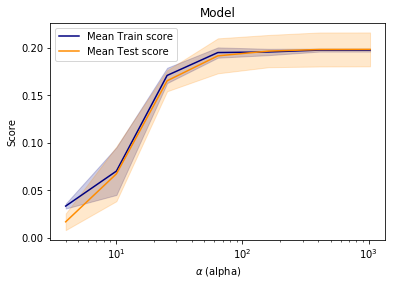

In [31]:
#To ignore Warnings
import warnings
warnings.filterwarnings("ignore")

#GridSearchCV on Logistc Regression 
from sklearn.model_selection import GridSearchCV
param_grid_LR = {"C": [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
print(param_grid_LR)
skf = StratifiedKFold(n_splits=2, random_state=100)

grid_LR= GridSearchCV(LR, param_grid_LR, cv=skf,scoring='r2')
grid_LR.fit(X_train, y_train)
print("Best Parameter :", grid_LR.best_params_)
print("Best Score :",grid_LR.best_score_)
print("test-set score: {}".format(grid_LR.score(X_test, y_test)))

##Visualizing the Parameters
train_scores_mean = grid_LR.cv_results_["mean_train_score"]
train_scores_std = grid_LR.cv_results_["std_train_score"]
test_scores_mean = grid_LR.cv_results_["mean_test_score"]
test_scores_std = grid_LR.cv_results_["std_test_score"]

alphas = np.logspace(2, 10, num=len(train_scores_mean), base=2)

plt.figure()
plt.title('Model')
plt.xlabel('$\\alpha$ (alpha)')
plt.ylabel('Score')

# plot train scores
plt.semilogx(alphas, train_scores_mean, label='Mean Train score',color='navy')

# create a shaded area between [mean - std, mean + std]
plt.gca().fill_between(alphas,train_scores_mean - train_scores_std,train_scores_mean + train_scores_std,
                       alpha=0.2, color='navy')
plt.semilogx(alphas, test_scores_mean,
label='Mean Test score', color='darkorange')

# create a shaded area between [mean - std, mean + std]
plt.gca().fill_between(alphas,test_scores_mean - test_scores_std,
test_scores_mean + test_scores_std,
alpha=0.2,
color='darkorange')
plt.legend(loc='best')
plt.show()

{'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
Best Parameter : {'C': 1}
Best Score : 0.16607705579770232
test-set score: 0.1602813939096338


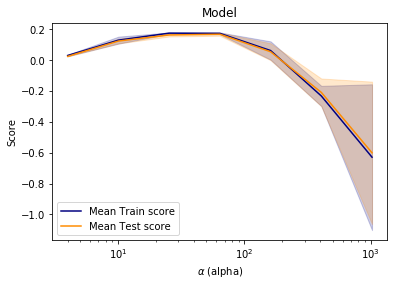

In [32]:
#GridSearchCV with Linear SVC 
param_grid_LSV = {"C": [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
print(param_grid_LSV)
skf = StratifiedKFold(n_splits=2, random_state=100)

grid_LSV= GridSearchCV(LSV, param_grid_LSV, cv=skf,scoring='r2')
grid_LSV.fit(X_train, y_train)
print("Best Parameter :", grid_LSV.best_params_)
print("Best Score :",grid_LSV.best_score_)
print("test-set score: {}".format(grid_LSV.score(X_test, y_test)))

## Visualizing the Parameters
train_scores_mean = grid_LSV.cv_results_["mean_train_score"]
train_scores_std = grid_LSV.cv_results_["std_train_score"]
test_scores_mean = grid_LSV.cv_results_["mean_test_score"]
test_scores_std = grid_LSV.cv_results_["std_test_score"]

alphas = np.logspace(2, 10, num=len(train_scores_mean), base=2)

plt.figure()
plt.title('Model')
plt.xlabel('$\\alpha$ (alpha)')
plt.ylabel('Score')

# plot train scores
plt.semilogx(alphas, train_scores_mean, label='Mean Train score',color='navy')

# create a shaded area between [mean - std, mean + std]
plt.gca().fill_between(alphas,train_scores_mean - train_scores_std,train_scores_mean + train_scores_std,
                       alpha=0.2, color='navy')
plt.semilogx(alphas, test_scores_mean,
label='Mean Test score', color='darkorange')

# create a shaded area between [mean - std, mean + std]
plt.gca().fill_between(alphas,test_scores_mean - test_scores_std,
test_scores_mean + test_scores_std,
alpha=0.2,
color='darkorange')
plt.legend(loc='best')
plt.show()

{'shrink_threshold': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
Best Parameter : {'shrink_threshold': 10}
Best Score : -0.4693860158106985
test-set score: -0.8130292191209623


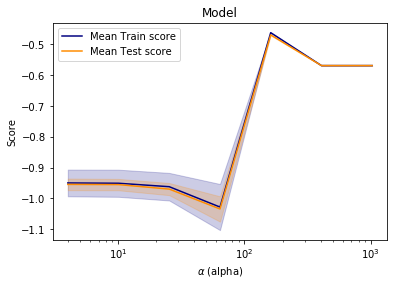

In [33]:
#GridSearchCV with NearestCentroid
param_grid_NCR = {"shrink_threshold": [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
print(param_grid_NCR)
skf = StratifiedKFold(n_splits=2, random_state=100)

grid_NCR= GridSearchCV(NCR, param_grid_NCR, cv=skf,scoring='r2')
grid_NCR.fit(X_train, y_train)
print("Best Parameter :", grid_NCR.best_params_)
print("Best Score :",grid_NCR.best_score_)
print("test-set score: {}".format(grid_NCR.score(X_test, y_test)))

## Visualizing the Parameters
train_scores_mean = grid_NCR.cv_results_["mean_train_score"]
train_scores_std = grid_NCR.cv_results_["std_train_score"]
test_scores_mean = grid_NCR.cv_results_["mean_test_score"]
test_scores_std = grid_NCR.cv_results_["std_test_score"]

alphas = np.logspace(2, 10, num=len(train_scores_mean), base=2)

plt.figure()
plt.title('Model')
plt.xlabel('$\\alpha$ (alpha)')
plt.ylabel('Score')

# plot train scores
plt.semilogx(alphas, train_scores_mean, label='Mean Train score',color='navy')

# create a shaded area between [mean - std, mean + std]
plt.gca().fill_between(alphas,train_scores_mean - train_scores_std,train_scores_mean + train_scores_std,
                       alpha=0.2, color='navy')
plt.semilogx(alphas, test_scores_mean,
label='Mean Test score', color='darkorange')

# create a shaded area between [mean - std, mean + std]
plt.gca().fill_between(alphas,test_scores_mean - test_scores_std,
test_scores_mean + test_scores_std,
alpha=0.2,
color='darkorange')
plt.legend(loc='best')
plt.show()

{'max_depth': [1, 5, 10, 15, 20, 25, 30], 'min_samples_leaf': [1, 2, 4, 6, 8, 10]}
Best Parameter : {'max_depth': 20, 'min_samples_leaf': 4}
Best Score : 0.29112159220710704
test-set score: 0.40938460749977856


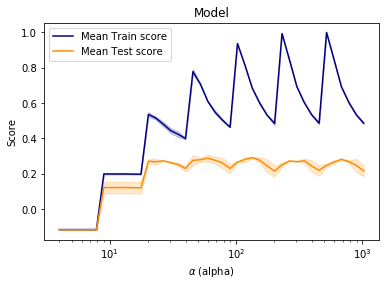

In [34]:
#GridSearchCV with Decision Tree
param_grid_DT = {"max_depth" : [1, 5, 10, 15, 20, 25, 30],
                 "min_samples_leaf" : [1, 2, 4, 6, 8, 10]}
print(param_grid_DT)
skf = StratifiedKFold(n_splits=2, random_state=100)

grid_DT= GridSearchCV(DT, param_grid_DT, cv=skf,scoring='r2')
grid_DT.fit(X_train, y_train)
print("Best Parameter :", grid_DT.best_params_)
print("Best Score :",grid_DT.best_score_)
print("test-set score: {}".format(grid_DT.score(X_test, y_test)))

## Visualizing the Parameters
train_scores_mean = grid_DT.cv_results_["mean_train_score"]
train_scores_std = grid_DT.cv_results_["std_train_score"]
test_scores_mean = grid_DT.cv_results_["mean_test_score"]
test_scores_std = grid_DT.cv_results_["std_test_score"]

alphas = np.logspace(2, 10, num=len(train_scores_mean), base=2)

plt.figure()
plt.title('Model')
plt.xlabel('$\\alpha$ (alpha)')
plt.ylabel('Score')

# plot train scores
plt.semilogx(alphas, train_scores_mean, label='Mean Train score',color='navy')

# create a shaded area between [mean - std, mean + std]
plt.gca().fill_between(alphas,train_scores_mean - train_scores_std,train_scores_mean + train_scores_std,
                       alpha=0.2, color='navy')
plt.semilogx(alphas, test_scores_mean,
label='Mean Test score', color='darkorange')

# create a shaded area between [mean - std, mean + std]
plt.gca().fill_between(alphas,test_scores_mean - test_scores_std,
test_scores_mean + test_scores_std,
alpha=0.2,
color='darkorange')
plt.legend(loc='best')
plt.show()

{'max_depth': [80, 90, 100, 110], 'max_features': [2, 3], 'min_samples_leaf': [3, 4, 5], 'min_samples_split': [8, 10, 12], 'n_estimators': [100, 200, 300, 1000]}
Best Parameter : {'max_depth': 80, 'max_features': 3, 'min_samples_leaf': 3, 'min_samples_split': 8, 'n_estimators': 300}
Best Score : 0.3518833271586194
test-set score: 0.4342389343723795


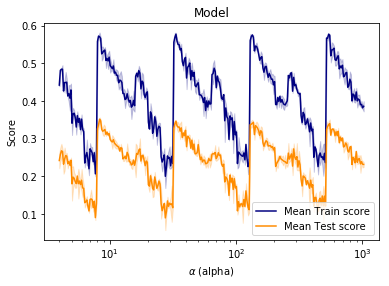

In [35]:
#GridSearchCV with Random Forest
param_grid_RF = {'max_depth': [80, 90, 100, 110],
                'max_features': [2, 3],
                'min_samples_leaf': [3, 4, 5],
                'min_samples_split': [8, 10, 12],
                'n_estimators': [100, 200, 300, 1000]}
print(param_grid_RF)
skf = StratifiedKFold(n_splits=2, random_state=100)

grid_RF= GridSearchCV(RF, param_grid_RF, cv=skf,scoring='r2')
grid_RF.fit(X_train, y_train)
print("Best Parameter :", grid_RF.best_params_)
print("Best Score :",grid_RF.best_score_)
print("test-set score: {}".format(grid_RF.score(X_test, y_test)))

## Visualizing the Parameters
train_scores_mean = grid_RF.cv_results_["mean_train_score"]
train_scores_std = grid_RF.cv_results_["std_train_score"]
test_scores_mean = grid_RF.cv_results_["mean_test_score"]
test_scores_std = grid_RF.cv_results_["std_test_score"]

alphas = np.logspace(2, 10, num=len(train_scores_mean), base=2)

plt.figure()
plt.title('Model')
plt.xlabel('$\\alpha$ (alpha)')
plt.ylabel('Score')

# plot train scores
plt.semilogx(alphas, train_scores_mean, label='Mean Train score',color='navy')

# create a shaded area between [mean - std, mean + std]
plt.gca().fill_between(alphas,train_scores_mean - train_scores_std,train_scores_mean + train_scores_std,
                       alpha=0.2, color='navy')
plt.semilogx(alphas, test_scores_mean,
label='Mean Test score', color='darkorange')

# create a shaded area between [mean - std, mean + std]
plt.gca().fill_between(alphas,test_scores_mean - test_scores_std,
test_scores_mean + test_scores_std,
alpha=0.2,
color='darkorange')
plt.legend(loc='best')
plt.show()

- GridSearchCV was used to tune the parameters to obtain the best possible accuracy score for the all the models with Stratified KFoldCV. It also gives out the best parameters for the model. 
- The Graph gives us the Mean train and test scores on with varying alpha parameter 

# 4. Modeling with Kfold + Shuffling 


In [36]:
from sklearn.model_selection import KFold
seed=7
kf = KFold(n_splits=10,shuffle=True, random_state=100)
for train_index, test_index in kf.split(X_Scaled):
    X_train, X_test = X_Scaled.iloc[train_index], X_Scaled.iloc[test_index] 
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]


In [37]:
LR=LogisticRegression()
LR.fit(X_train,y_train)
y_pred=LR.predict(X_test)
print ("Logistic Regression Accuracy : ",metrics.accuracy_score(y_test, y_pred))
scores = cross_val_score(LR, X_train, y_train) 
print("Cross-Validation score:",scores)

Logistic Regression Accuracy :  0.7196213425129088
Cross-Validation score: [0.72007113 0.71913722 0.71467921]


In [38]:
LSV=LinearSVC()
LSV.fit(X_train,y_train)
y_pred=LSV.predict(X_test)
print ("LinearSVC : ",metrics.accuracy_score(y_test, y_pred))
scores = cross_val_score(LSV, X_train, y_train) 
print("Cross-Validation score:",scores)

LinearSVC :  0.7153184165232358
Cross-Validation score: [0.71875179 0.71603947 0.71140824]


In [39]:
NCR=NearestCentroid()
NCR.fit(X_train,y_train)
y_pred=NCR.predict(X_test)
print ("NearestCentroid : ",metrics.accuracy_score(y_test, y_pred))
scores = cross_val_score(NCR, X_train, y_train) 
print("Cross-Validation score:",scores)

NearestCentroid :  0.5533562822719449
Cross-Validation score: [0.55331842 0.55960303 0.55531964]


In [40]:
DT=DecisionTreeClassifier()
DT.fit(X_train,y_train)
y_pred=DT.predict(X_test)
print ("DecisionTreeClassifier : ",metrics.accuracy_score(y_test, y_pred))
scores = cross_val_score(DT, X_train, y_train) 
print("Cross-Validation score:",scores)

DecisionTreeClassifier :  0.8364888123924269
Cross-Validation score: [0.81185109 0.81298761 0.80443016]


In [41]:
RF=RandomForestClassifier()
RF.fit(X_train,y_train)
y_pred=RF.predict(X_test)
print ("RandomForestClassifier : ",metrics.accuracy_score(y_test, y_pred))
scores = cross_val_score(RF, X_train, y_train) 
print("Cross-Validation score:",scores)

RandomForestClassifier :  0.8655765920826162
Cross-Validation score: [0.84460506 0.84597292 0.84660852]


The Model with KFold CV and Shuffling after Scaling have Accuracy Scores are as follows:
- Logistic Regression 71.9%
- Linear SVC 71.5%
- Nearest Centroid 55.3% 
- Decision Tree 83.6% 
- Random Forest 86.5%

The Decision Tree and Random Forest models accuracy has increased after KFoldCV with Shuffle. The other model acuracies remains the same.

# 4.1 Changed random seed 

In [42]:
kf_R = KFold(n_splits=10,shuffle=True, random_state=10)
for train_index, test_index in kf_R.split(X_Scaled):
    X_train, X_test = X_Scaled.iloc[train_index], X_Scaled.iloc[test_index] 
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]


In [43]:
LR=LogisticRegression()
LR.fit(X_train,y_train)
y_pred=LR.predict(X_test)
print ("Logistic Regression Accuracy : ",metrics.accuracy_score(y_test, y_pred))
scores = cross_val_score(LR, X_train, y_train) 
print("Cross-Validation score:",scores)

Logistic Regression Accuracy :  0.7228915662650602
Cross-Validation score: [0.71789136 0.7199082  0.71465458]


In [44]:
LSV=LinearSVC()
LSV.fit(X_train,y_train)
y_pred=LSV.predict(X_test)
print ("LinearSVC : ",metrics.accuracy_score(y_test, y_pred))
scores = cross_val_score(LSV, X_train, y_train) 
print("Cross-Validation score:",scores)

LinearSVC :  0.7225473321858864
Cross-Validation score: [0.71508059 0.71652324 0.71086757]


In [45]:
NCR=NearestCentroid()
NCR.fit(X_train,y_train)
y_pred=NCR.predict(X_test)
print ("NearestCentroid : ",metrics.accuracy_score(y_test, y_pred))
scores = cross_val_score(NCR, X_train, y_train) 
print("Cross-Validation score:",scores)

NearestCentroid :  0.561790017211704
Cross-Validation score: [0.54792635 0.55461847 0.55462474]


In [46]:
DT=DecisionTreeClassifier()
DT.fit(X_train,y_train)
y_pred=DT.predict(X_test)
print ("DecisionTreeClassifier : ",metrics.accuracy_score(y_test, y_pred))
scores = cross_val_score(DT, X_train, y_train) 
print("Cross-Validation score:",scores)

DecisionTreeClassifier :  0.8328743545611016
Cross-Validation score: [0.8029599  0.81778543 0.80640349]


In [47]:
RF=RandomForestClassifier()
RF.fit(X_train,y_train)
y_pred=RF.predict(X_test)
print ("RandomForestClassifier : ",metrics.accuracy_score(y_test, y_pred))
scores = cross_val_score(RF, X_train, y_train) 
print("Cross-Validation score:",scores)

RandomForestClassifier :  0.8612736660929432
Cross-Validation score: [0.84190902 0.84681583 0.8445031 ]


The Model with KFold CV after Scaling and changed random seed have Accuracy Scores as follows:
- Logistic Regression 72.2%
- Linear SVC 72.2%
- Nearest Centroid 56.1% 
- Decision Tree 83.2% 
- Random Forest 86.1%

The change in random seed has no significant effect on the accuracy of the model.

# 4.2 Change in random state of split

In [48]:
kf_R = KFold(n_splits=7,shuffle=True, random_state=10)
for train_index, test_index in kf_R.split(X_Scaled):
    X_train, X_test = X_Scaled.iloc[train_index], X_Scaled.iloc[test_index] 
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

In [49]:
LR=LogisticRegression()
LR.fit(X_train,y_train)
y_pred=LR.predict(X_test)
print ("Logistic Regression Accuracy : ",metrics.accuracy_score(y_test, y_pred))
scores = cross_val_score(LR, X_train, y_train) 
print("Cross-Validation score:",scores)

Logistic Regression Accuracy :  0.7197934595524957
Cross-Validation score: [0.71999771 0.7195066  0.71616272]


In [50]:
LSV=LinearSVC()
LSV.fit(X_train,y_train)
y_pred=LSV.predict(X_test)
print ("LinearSVC : ",metrics.accuracy_score(y_test, y_pred))
scores = cross_val_score(LSV, X_train, y_train) 
print("Cross-Validation score:",scores)

LinearSVC :  0.712736660929432
Cross-Validation score: [0.71844883 0.71790017 0.71174479]


In [51]:
NCR=NearestCentroid()
NCR.fit(X_train,y_train)
y_pred=NCR.predict(X_test)
print ("NearestCentroid : ",metrics.accuracy_score(y_test, y_pred))
scores = cross_val_score(NCR, X_train, y_train) 
print("Cross-Validation score:",scores)

NearestCentroid :  0.5526678141135972
Cross-Validation score: [0.54979348 0.55834768 0.55482242]


In [52]:
DT=DecisionTreeClassifier()
DT.fit(X_train,y_train)
y_pred=DT.predict(X_test)
print ("DecisionTreeClassifier : ",metrics.accuracy_score(y_test, y_pred))
scores = cross_val_score(DT, X_train, y_train) 
print("Cross-Validation score:",scores)

DecisionTreeClassifier :  0.8290877796901893
Cross-Validation score: [0.81281551 0.81130235 0.8089965 ]


In [53]:
RF=RandomForestClassifier()
RF.fit(X_train,y_train)
y_pred=RF.predict(X_test)
print ("RandomForestClassifier : ",metrics.accuracy_score(y_test, y_pred))
scores = cross_val_score(RF, X_train, y_train) 
print("Cross-Validation score:",scores)

RandomForestClassifier :  0.8631669535283993
Cross-Validation score: [0.84092474 0.84348824 0.83756957]


##Explain the change in accuracy 
The Model with KFold CV after Scaling and changed seed and splits have Accuracy Scores as follows:
- Logistic Regression 71.9%
- Linear SVC 71.2%
- Nearest Centroid 55.2% 
- Decision Tree 82.9% 
- Random Forest 86.3%

The NearestCentroid and Logistic Regression Models have increased slightly in accuracy. Overall all the model accuracies remains the same.

# 5. Visualizing the Coefficients of LR & SVM

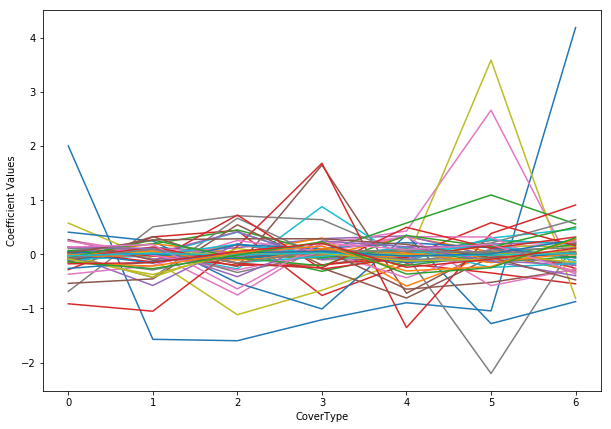

In [54]:
LR = LogisticRegression()
LR.fit(X_train, y_train) 
plt.figure(figsize=(10,7))
plt.plot(LR.coef_)
plt.xlabel("CoverType")
plt.ylabel("Coefficient Values")
plt.show()      

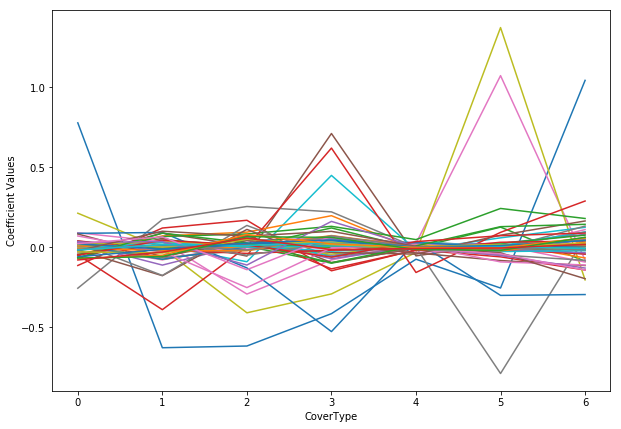

In [55]:
LSV = LinearSVC()
LSV.fit(X_train, y_train) 
plt.figure(figsize=(10,7))
plt.plot(LSV.coef_)
plt.xlabel("CoverType")
plt.ylabel("Coefficient Values")
plt.show() 

# 5.1 Feature Importance of Decision Tree 

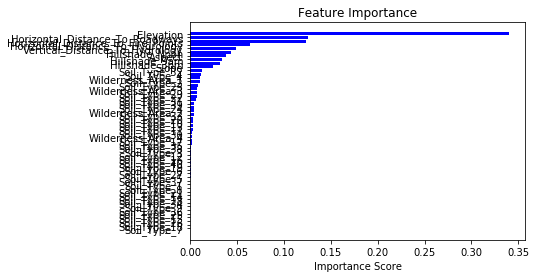

In [56]:
DT=DecisionTreeClassifier()
DT.fit(X_train,y_train)
features = list(X)
importances = DT.feature_importances_
indices = np.argsort(importances)
      
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Importance Score')
plt.show()

# Conclusion 


- The Dataset was slashed to only 10% keeping in mind the system restriction and to save computing time. 
- We went through the model building process initially with the Stratified KFold CV and then used the bagging ensemble model. The ensemble model didnt show us the required results as we had less data (i.e only 10%). 
- There was no significant difference between Stratified KFold and KFold.
- Scaling of data had a great impact on the LinearSVC and NearestCentroid Model.
- GridSearchCV is useful in finding the best parameters for getting the best scores.
- The coefficients of Logistic Regression & LinearSVC and important features of Decision Tree have also been visualized. 